In [22]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
img = cv2.imread('./test_images/ahadraza.jpg')
img.shape

(1440, 1080, 3)

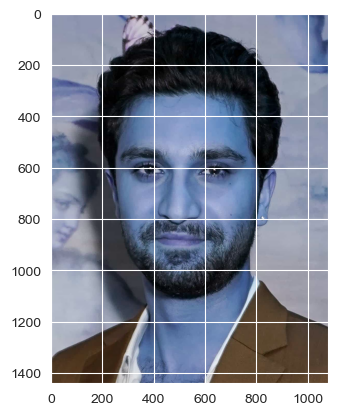

In [24]:
plt.imshow(img)

In [25]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1440, 1080)

In [26]:
gray

array([[158, 158, 158, ..., 142, 142, 142],
       [158, 158, 158, ..., 142, 142, 142],
       [158, 158, 158, ..., 142, 142, 142],
       ...,
       [ 52,  52,  52, ...,  72,  72,  73],
       [ 52,  52,  52, ...,  72,  72,  73],
       [ 52,  52,  52, ...,  72,  72,  73]], dtype=uint8)

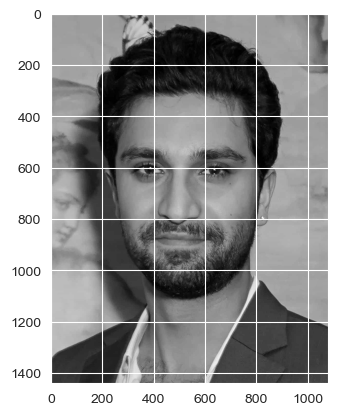

In [27]:
plt.imshow(gray, cmap='gray')

In [28]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[139, 335, 737, 737]])

In [29]:
(x,y,w,h) = faces[0]
x,y,w,h

(139, 335, 737, 737)

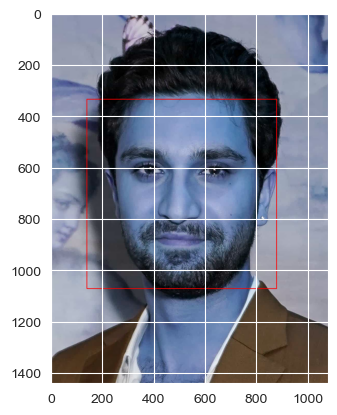

In [30]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

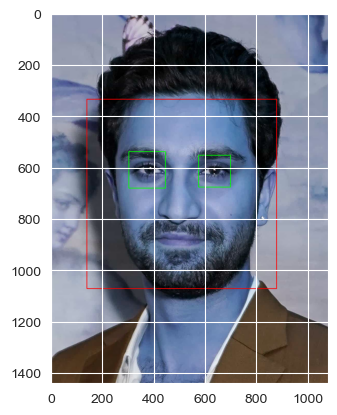

In [31]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

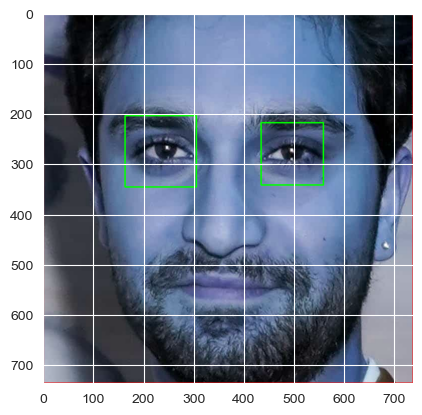

In [32]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [33]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

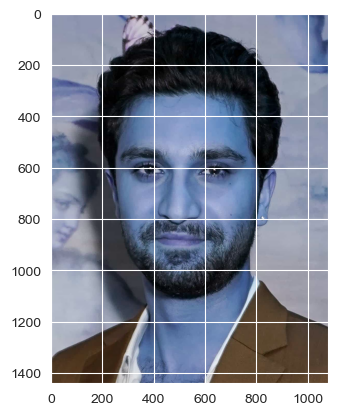

In [34]:
original_image = cv2.imread('./test_images/ahadraza.jpg')
plt.imshow(original_image)

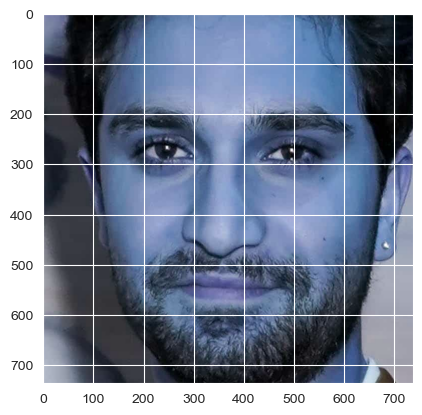

In [35]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/ahadraza.jpg')
plt.imshow(cropped_image)

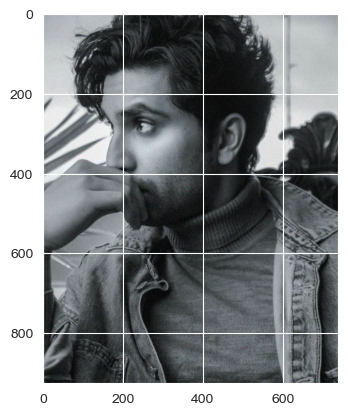

In [36]:
org_image_obstructed = cv2.imread('./test_images/ahadraza2.jpg')
plt.imshow(org_image_obstructed)

In [37]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/ahadraza2.jpg')
cropped_image_no_2_eyes

In [38]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [39]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [40]:
img_dirs

['./dataset/Ahad_Raza_SA',
 './dataset/Arsalan_Ash_M',
 './dataset/Asim_Azher_M',
 './dataset/Ayeza_Khan_HA',
 './dataset/Babar_Azam_M',
 './dataset/Bilal_Abbas_HA',
 './dataset/Danish_Taimoor_M',
 './dataset/Fahad_Mustafa_HA',
 './dataset/Fawad_Khan_SA',
 './dataset/Hamza_Ali_SA',
 './dataset/Hania_Amir_SA',
 './dataset/Humayun_Saeed_HF',
 './dataset/Iqra_Azeez_HF',
 './dataset/Javed_Sheikh_M',
 './dataset/Mahira_Khan_HA',
 './dataset/Mawra_Hoc_HF',
 './dataset/Mehwish_Hayat_HF',
 './dataset/Saira_Yousuf_SA',
 './dataset/Sajal_Ali_HA',
 './dataset/Sara_Khan_HF']

In [41]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [42]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  

Ahad_Raza_SA
Generating cropped images in folder:  ./dataset/cropped/Ahad_Raza_SA
Arsalan_Ash_M
Generating cropped images in folder:  ./dataset/cropped/Arsalan_Ash_M
Asim_Azher_M
Generating cropped images in folder:  ./dataset/cropped/Asim_Azher_M
Ayeza_Khan_HA
Generating cropped images in folder:  ./dataset/cropped/Ayeza_Khan_HA
Babar_Azam_M
Generating cropped images in folder:  ./dataset/cropped/Babar_Azam_M
Bilal_Abbas_HA
Generating cropped images in folder:  ./dataset/cropped/Bilal_Abbas_HA
Danish_Taimoor_M
Generating cropped images in folder:  ./dataset/cropped/Danish_Taimoor_M
Fahad_Mustafa_HA
Generating cropped images in folder:  ./dataset/cropped/Fahad_Mustafa_HA
Fawad_Khan_SA
Generating cropped images in folder:  ./dataset/cropped/Fawad_Khan_SA
Hamza_Ali_SA
Generating cropped images in folder:  ./dataset/cropped/Hamza_Ali_SA
Hania_Amir_SA
Generating cropped images in folder:  ./dataset/cropped/Hania_Amir_SA
Humayun_Saeed_HF
Generating cropped images in folder:  ./dataset/cropp

In [43]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Ahad_Raza_SA': ['./dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA1.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA10.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA11.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA12.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA13.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA14.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA15.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA16.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA17.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA18.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA19.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA2.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA20.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA21.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA22.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA23.png',
  './dataset/cropped/Ahad_Raza_SA\\Ahad_Raza_SA24.png',
  './dataset/cropped/Ahad_Raza_SA\

In [44]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Ahad_Raza_SA': 0,
 'Arsalan_Ash_M': 1,
 'Asim_Azher_M': 2,
 'Ayeza_Khan_HA': 3,
 'Babar_Azam_M': 4,
 'Bilal_Abbas_HA': 5,
 'Danish_Taimoor_M': 6,
 'Fahad_Mustafa_HA': 7,
 'Fawad_Khan_SA': 8,
 'Hamza_Ali_SA': 9,
 'Hania_Amir_SA': 10,
 'Humayun_Saeed_HF': 11,
 'Iqra_Azeez_HF': 12,
 'Javed_Sheikh_M': 13,
 'Mahira_Khan_HA': 14,
 'Mawra_Hoc_HF': 15,
 'Mehwish_Hayat_HF': 16,
 'Saira_Yousuf_SA': 17,
 'Sajal_Ali_HA': 18,
 'Sara_Khan_HF': 19}

In [45]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pywt

# Ensure these cascade files are properly loaded
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Define the get_cropped_image_if_2_eyes function
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading image {image_path}")
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

# Define the w2d function
def w2d(img, mode='haar', level=1):
    # Convert image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Convert to float
    img_float = np.float32(img_gray)
    img_float /= 255
    # Compute coefficients
    coeffs = pywt.wavedec2(img_float, mode, level=level)
    # Process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    # Reconstruct image
    img_har = pywt.waverec2(coeffs_H, mode)
    img_har *= 255
    img_har = np.uint8(img_har)
    return img_har

# Assuming celebrity_file_names_dict and class_dict are already defined
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is not None:
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img, 'db1', 5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
            X.append(combined_img)
            y.append(class_dict[celebrity_name])

# Convert lists to numpy arrays
X = np.array(X).reshape(len(X), 32*32*3 + 32*32)
y = np.array(y)

print("Data processing complete.")


    

Data processing complete.


In [46]:
len(X[0])

4096

In [47]:
X[0]

array([ 12,  12,  12, ...,  46, 214, 200], dtype=uint8)

In [48]:
y[0]

0

In [49]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1115, 4096)

In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5017921146953405

In [52]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.18      0.31        11
           1       0.75      0.60      0.67        10
           2       0.50      0.67      0.57         3
           3       0.21      0.56      0.30         9
           4       1.00      0.71      0.83         7
           5       0.52      0.79      0.63        14
           6       0.80      0.40      0.53        10
           7       0.83      0.56      0.67         9
           8       0.67      0.57      0.62         7
           9       0.56      0.85      0.68        27
          10       0.50      0.56      0.53        25
          11       0.67      0.33      0.44        12
          12       0.21      0.17      0.19        18
          13       0.82      0.56      0.67        16
          14       0.28      0.57      0.37        14
          15       0.73      0.40      0.52        20
          16       0.78      0.44      0.56        16
          17       0.40    

In [53]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [54]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [55]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.529919,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.318128,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.465326,{'logisticregression__C': 1}


In [56]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [57]:
best_estimators['svm'].score(X_test,y_test)

0.5089605734767025

In [58]:
best_estimators['random_forest'].score(X_test,y_test)

0.27598566308243727

In [59]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5161290322580645

In [60]:
best_clf = best_estimators['svm']

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 2,  0,  0,  0,  0,  4,  0,  0,  1,  0,  1,  1,  0,  0,  1,  1,
         0,  0,  0,  0],
       [ 1,  7,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  1,
         1,  0,  0,  1],
       [ 0,  1,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 10,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  2],
       [ 0,  1,  1,  0,  0,  0,  0,  4,  1,  1,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0],
       [ 1,  0,  1,  0,  0,  1,  0,  0,  3,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0,  1, 20,  1,  1,  0,  0,  0,  0,
         0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0

Text(97.72222222222221, 0.5, 'Truth')

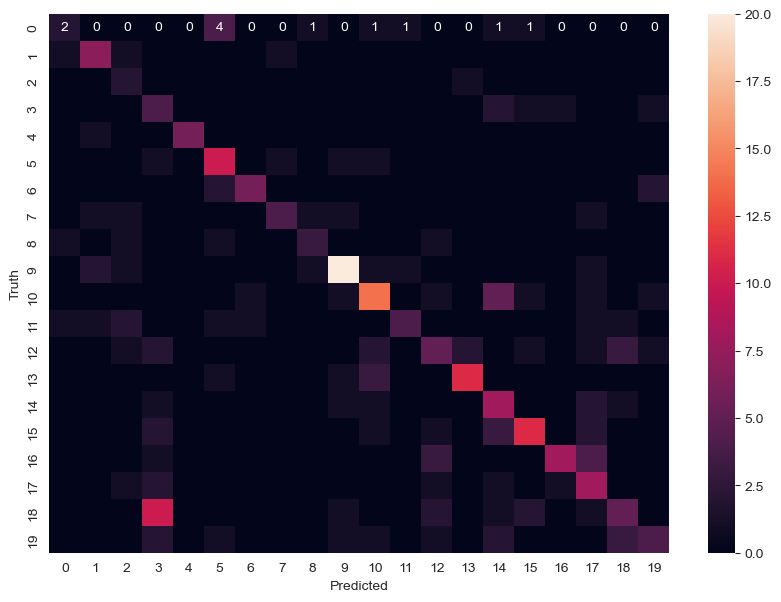

In [62]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
class_dict

{'Ahad_Raza_SA': 0,
 'Arsalan_Ash_M': 1,
 'Asim_Azher_M': 2,
 'Ayeza_Khan_HA': 3,
 'Babar_Azam_M': 4,
 'Bilal_Abbas_HA': 5,
 'Danish_Taimoor_M': 6,
 'Fahad_Mustafa_HA': 7,
 'Fawad_Khan_SA': 8,
 'Hamza_Ali_SA': 9,
 'Hania_Amir_SA': 10,
 'Humayun_Saeed_HF': 11,
 'Iqra_Azeez_HF': 12,
 'Javed_Sheikh_M': 13,
 'Mahira_Khan_HA': 14,
 'Mawra_Hoc_HF': 15,
 'Mehwish_Hayat_HF': 16,
 'Saira_Yousuf_SA': 17,
 'Sajal_Ali_HA': 18,
 'Sara_Khan_HF': 19}

In [64]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [65]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))